In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. trento'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,29.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,11.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-02-28T17:00:00,22,P.A. Trento,185,39,224,3709,3933,278,329,...,0.0,2714.0,440.0,265.0,17.41,5.70,12.12,74.77,2.63,7.61
370,2021-03-01T17:00:00,22,P.A. Trento,190,42,232,3465,3697,-236,57,...,2.0,1143.0,368.0,-244.0,18.10,6.28,4.99,15.49,7.69,-6.00
371,2021-03-02T17:00:00,22,P.A. Trento,191,42,233,3435,3668,-29,220,...,1.0,3060.0,465.0,-30.0,18.03,6.35,7.19,47.31,0.00,-0.78
372,2021-03-03T17:00:00,22,P.A. Trento,182,47,229,3524,3753,85,357,...,2.0,4061.0,680.0,89.0,20.52,6.10,8.79,52.50,11.90,2.32


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 229
Nuovi tamponi: 3752.0
Percentuale nuovi positivi/nuovi tamponi: 6.1 %
Nuovi guariti: 279.0
Nuovi deceduti: 2.0
Variazione positivi ricoverati con sintomi: -2.0
Variazione positivi in terapia intensiva: -1.0
Variazione positivi in isolamento dimiciliare: -49.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-03T17:00:00,22,P.A. Trento,382,44,426,1555,1981,-1,130,...,3.0,2151.0,385.0,-17.0,10.33,21.50,6.04,33.77,7.32,-0.05
1,2021-01-04T17:00:00,22,P.A. Trento,379,43,422,1643,2065,84,193,...,15.0,647.0,331.0,88.0,10.19,20.44,29.83,58.31,-2.27,4.24
2,2021-01-05T17:00:00,22,P.A. Trento,371,45,416,1660,2076,11,228,...,8.0,1792.0,433.0,17.0,10.82,20.04,12.72,52.66,4.65,0.53
3,2021-01-06T17:00:00,22,P.A. Trento,359,45,404,1620,2024,-52,203,...,5.0,2888.0,435.0,-40.0,11.14,19.96,7.03,46.67,0.00,-2.50
4,2021-01-07T17:00:00,22,P.A. Trento,361,47,408,1538,1946,-78,170,...,5.0,2529.0,385.0,-82.0,11.52,20.97,6.72,44.16,4.44,-3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-28T17:00:00,22,P.A. Trento,185,39,224,3709,3933,278,329,...,0.0,2714.0,440.0,265.0,17.41,5.70,12.12,74.77,2.63,7.61
57,2021-03-01T17:00:00,22,P.A. Trento,190,42,232,3465,3697,-236,57,...,2.0,1143.0,368.0,-244.0,18.10,6.28,4.99,15.49,7.69,-6.00
58,2021-03-02T17:00:00,22,P.A. Trento,191,42,233,3435,3668,-29,220,...,1.0,3060.0,465.0,-30.0,18.03,6.35,7.19,47.31,0.00,-0.78
59,2021-03-03T17:00:00,22,P.A. Trento,182,47,229,3524,3753,85,357,...,2.0,4061.0,680.0,89.0,20.52,6.10,8.79,52.50,11.90,2.32


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

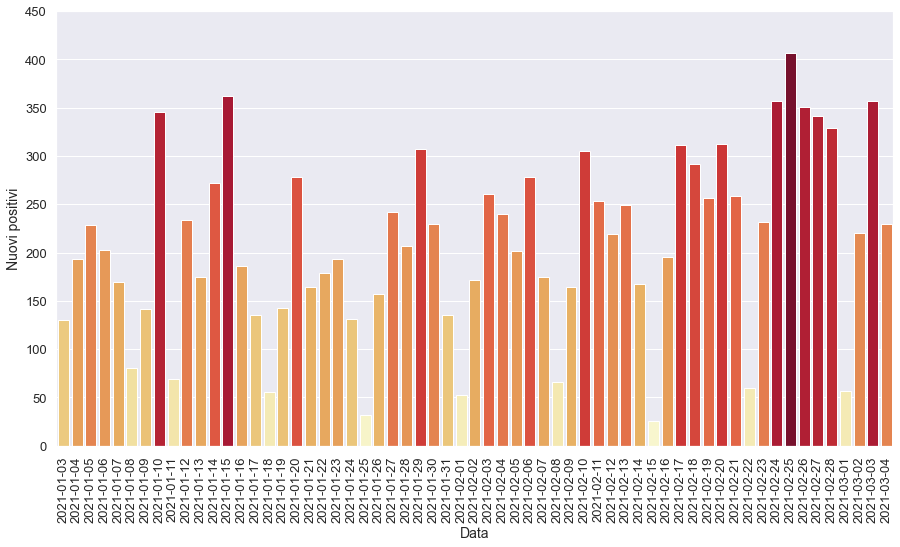

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

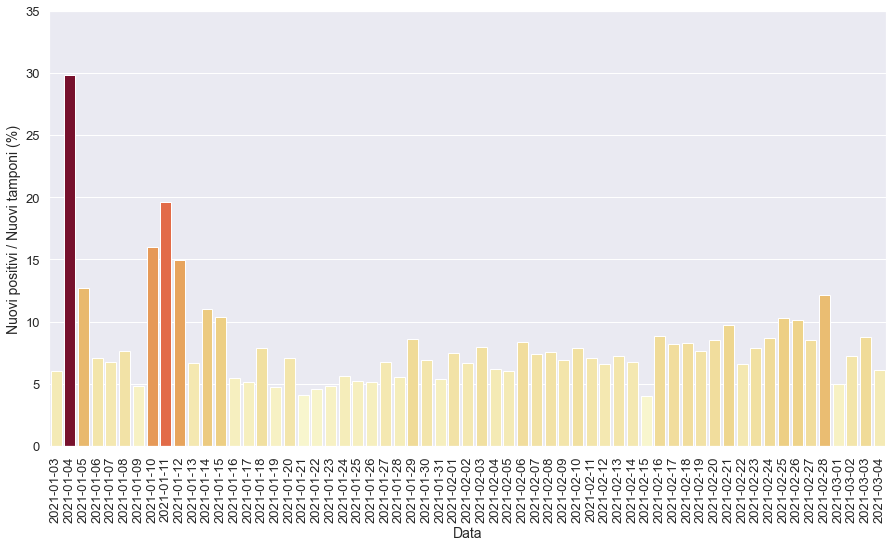

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

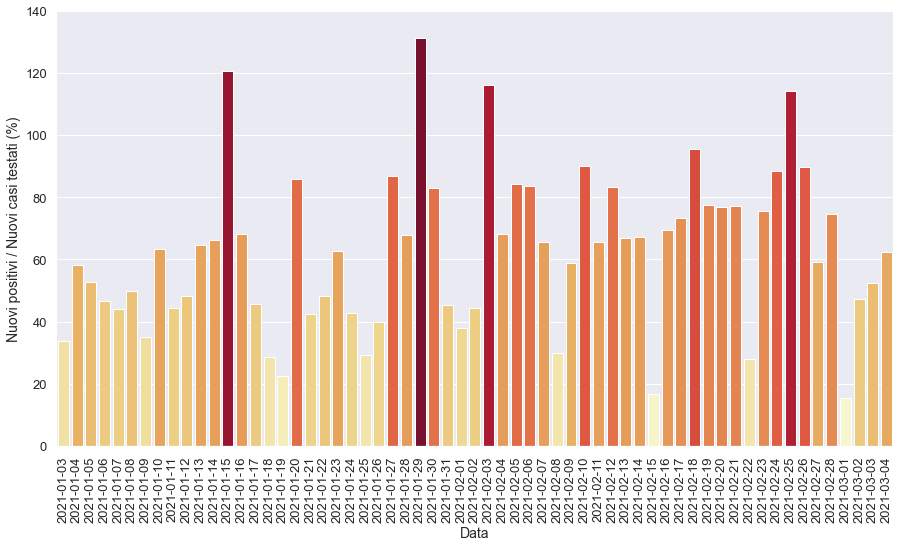

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

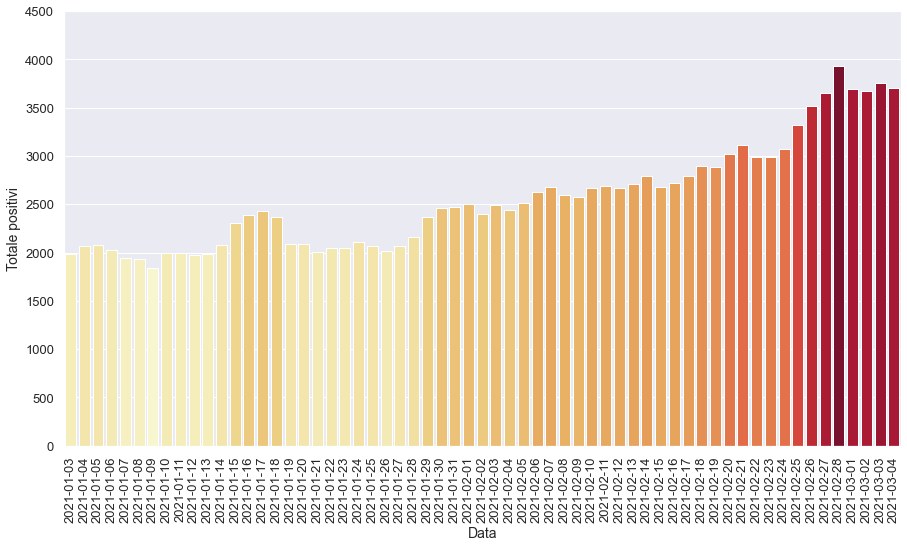

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

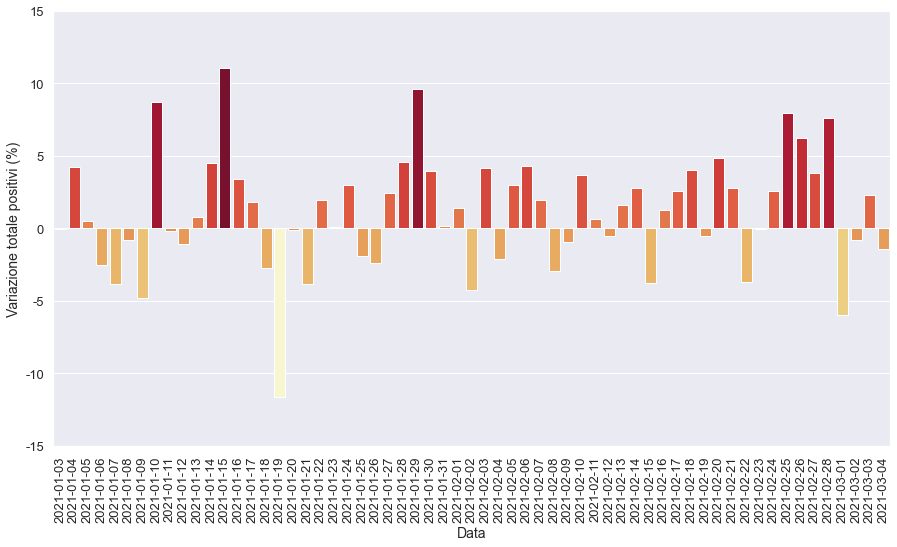

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

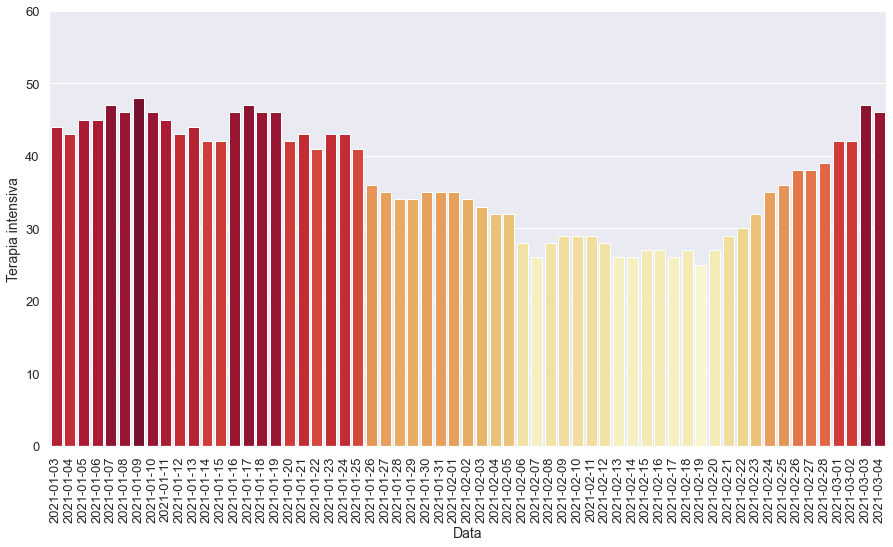

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

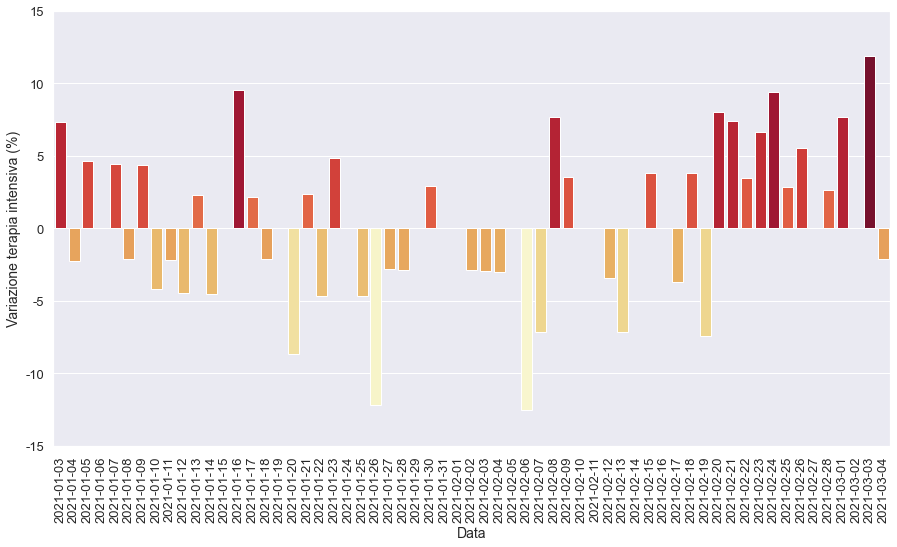

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

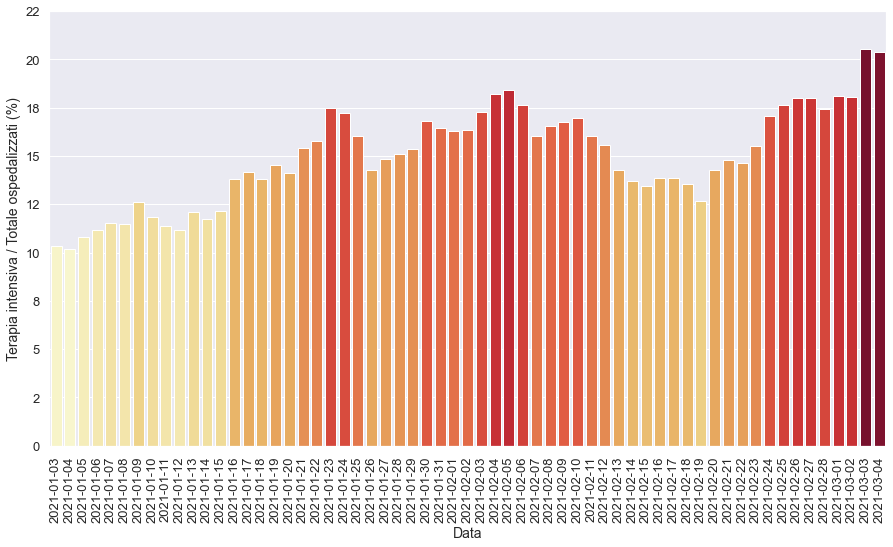

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

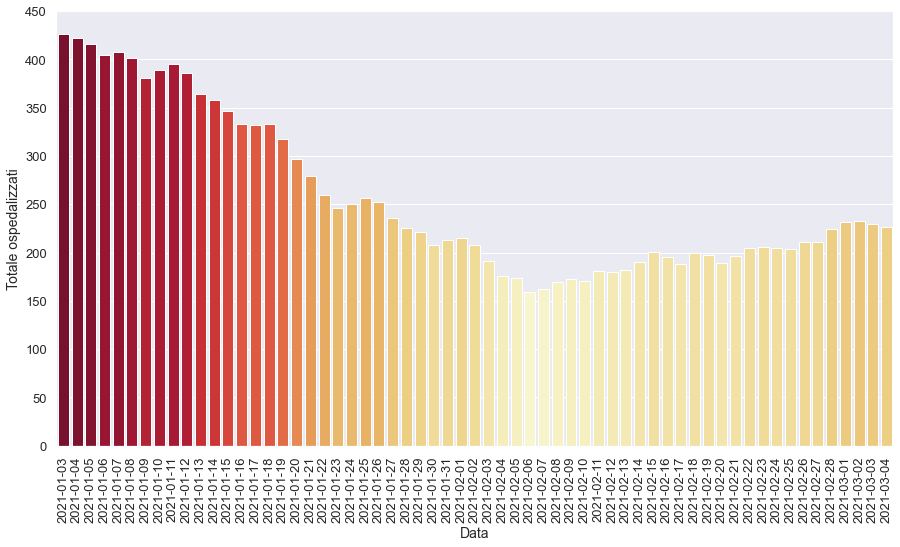

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

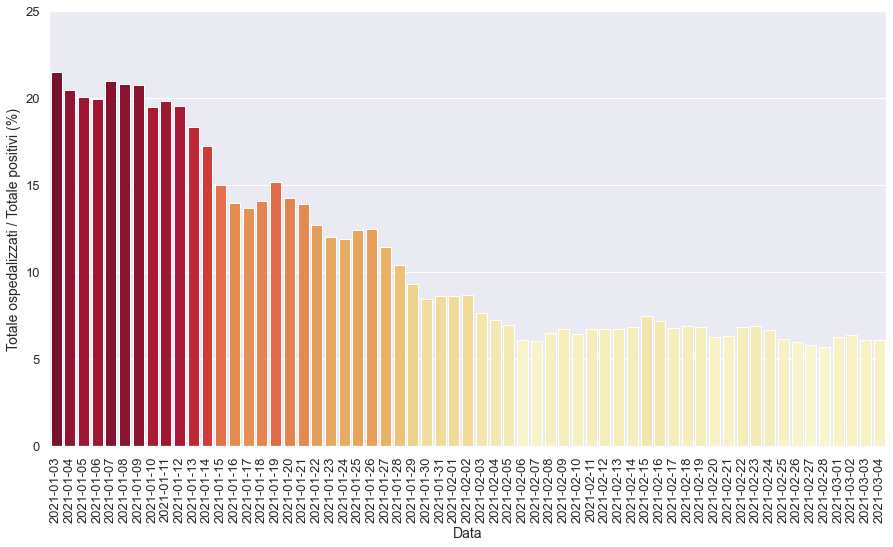

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

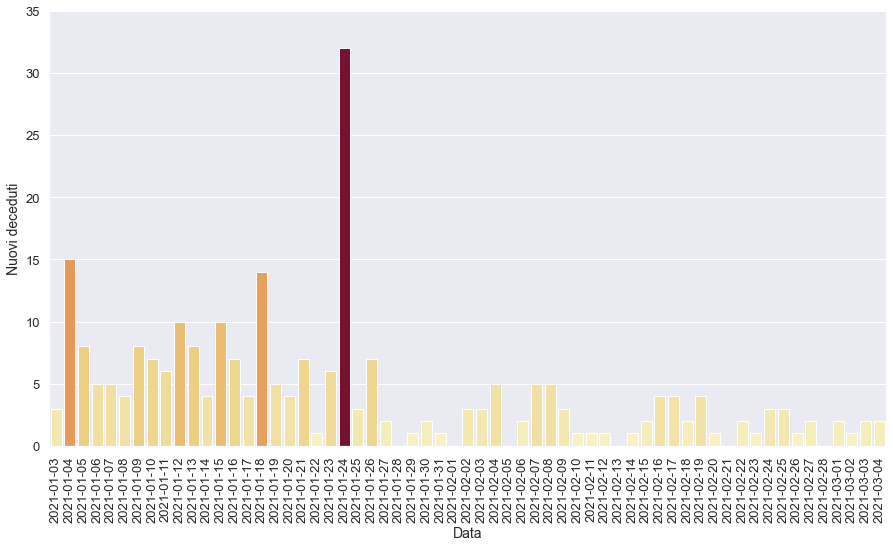

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

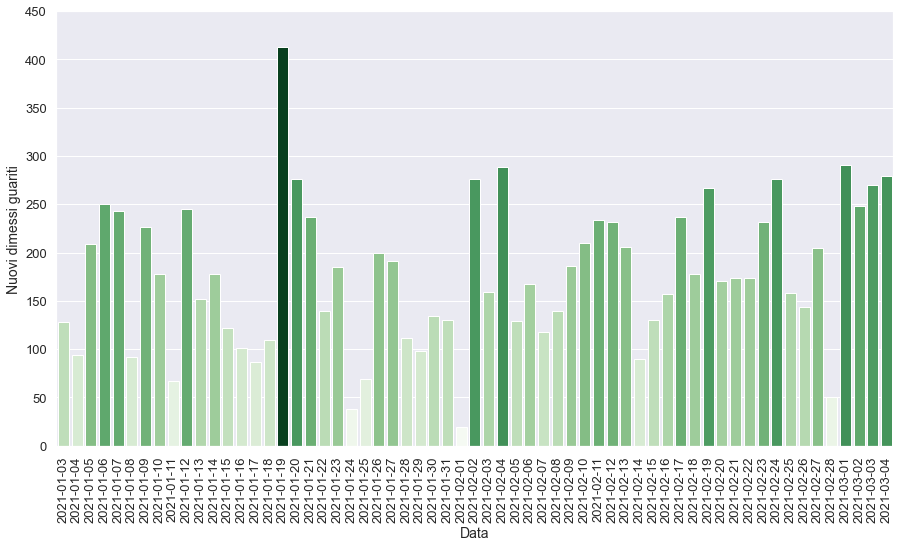

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-02T17:00:00,22,P.A. Trento,174,34,208,2188,2396,-107,172,...,3.0,2595.0,389.0,-100.0,16.35,8.68,6.63,44.22,-2.86,-4.27
1,2021-02-03T17:00:00,22,P.A. Trento,158,33,191,2304,2495,99,261,...,3.0,3290.0,225.0,116.0,17.28,7.66,7.93,116.00,-2.94,4.13
2,2021-02-04T17:00:00,22,P.A. Trento,144,32,176,2266,2442,-53,240,...,5.0,3867.0,352.0,-38.0,18.18,7.21,6.21,68.18,-3.03,-2.12
3,2021-02-05T17:00:00,22,P.A. Trento,142,32,174,2341,2515,73,202,...,0.0,3333.0,240.0,75.0,18.39,6.92,6.06,84.17,0.00,2.99
4,2021-02-06T17:00:00,22,P.A. Trento,131,28,159,2465,2624,109,278,...,2.0,3331.0,332.0,124.0,17.61,6.06,8.35,83.73,-12.50,4.33
5,2021-02-07T17:00:00,22,P.A. Trento,136,26,162,2514,2676,52,175,...,5.0,2363.0,267.0,49.0,16.05,6.05,7.41,65.54,-7.14,1.98
6,2021-02-08T17:00:00,22,P.A. Trento,141,28,169,2428,2597,-79,66,...,5.0,878.0,222.0,-86.0,16.57,6.51,7.52,29.73,7.69,-2.95
7,2021-02-09T17:00:00,22,P.A. Trento,144,29,173,2399,2572,-25,164,...,3.0,2366.0,279.0,-29.0,16.76,6.73,6.93,58.78,3.57,-0.96
8,2021-02-10T17:00:00,22,P.A. Trento,142,29,171,2495,2666,94,305,...,1.0,3881.0,339.0,96.0,16.96,6.41,7.86,89.97,0.00,3.65
9,2021-02-11T17:00:00,22,P.A. Trento,152,29,181,2503,2684,18,253,...,1.0,3568.0,386.0,8.0,16.02,6.74,7.09,65.54,0.00,0.68


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

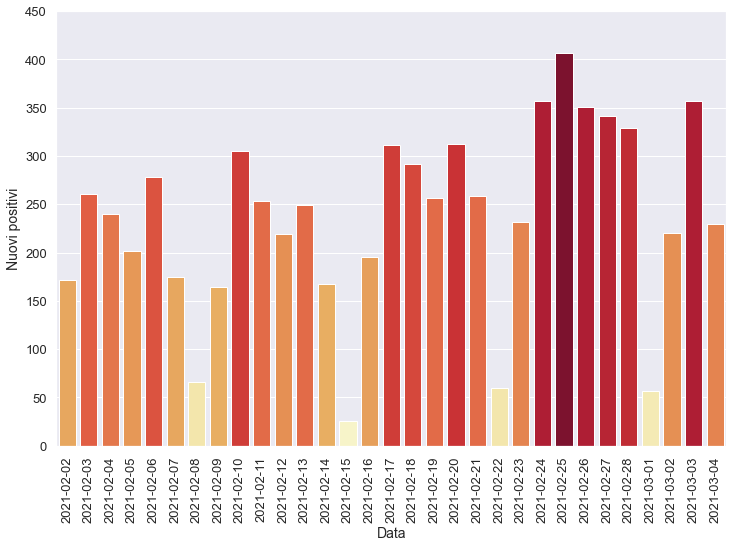

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

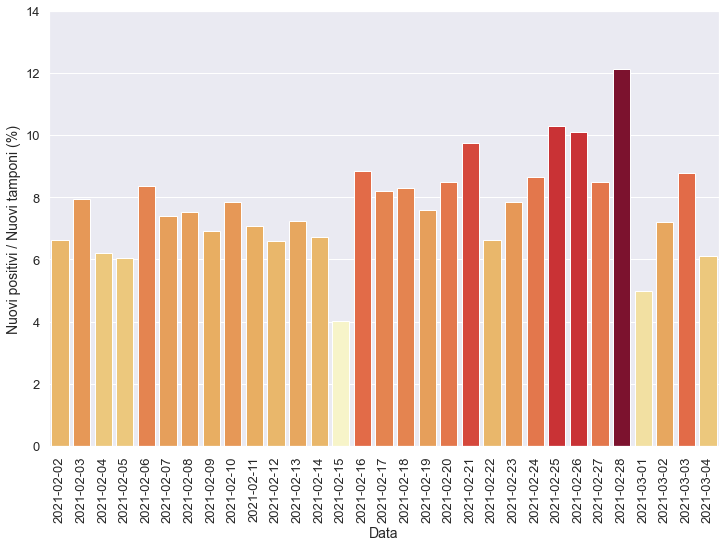

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

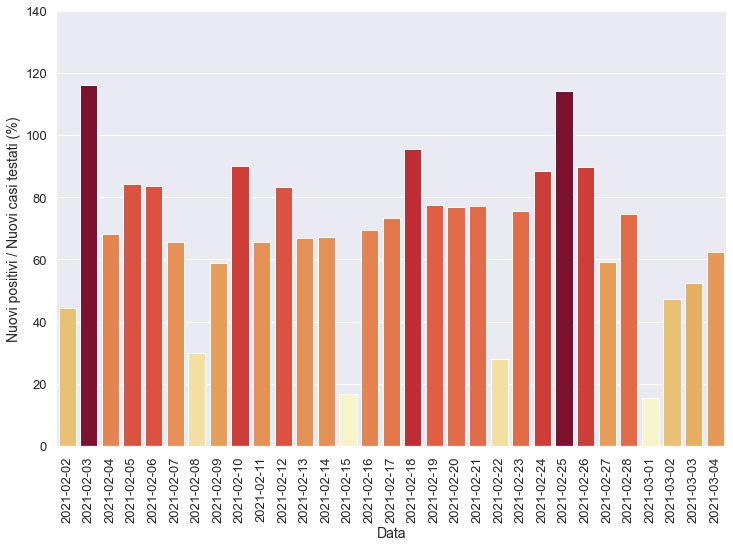

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

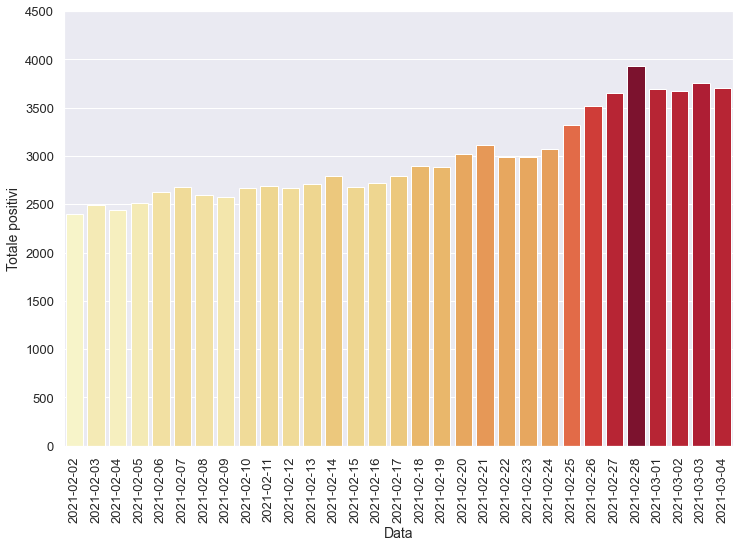

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

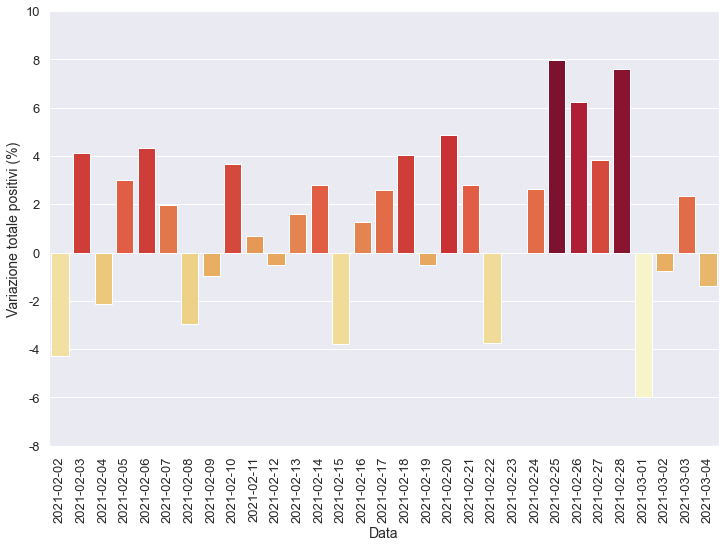

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

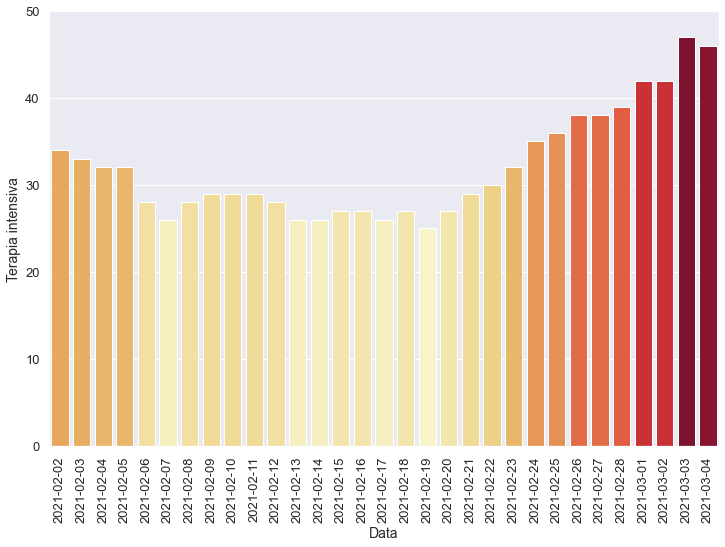

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

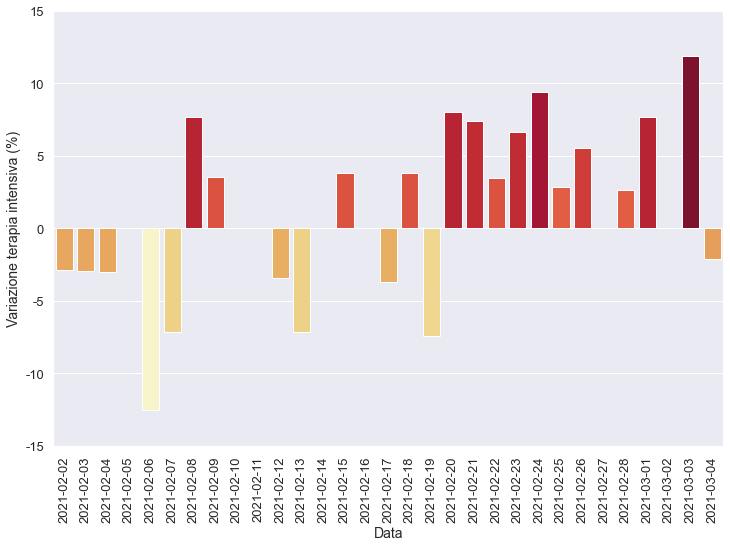

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

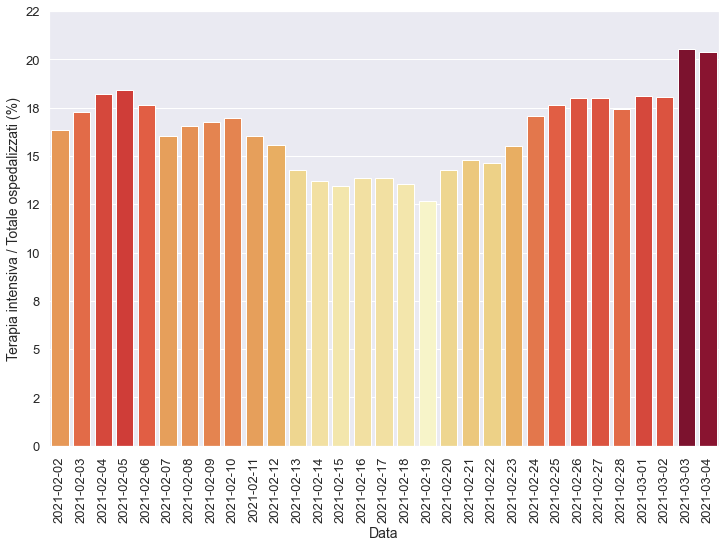

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

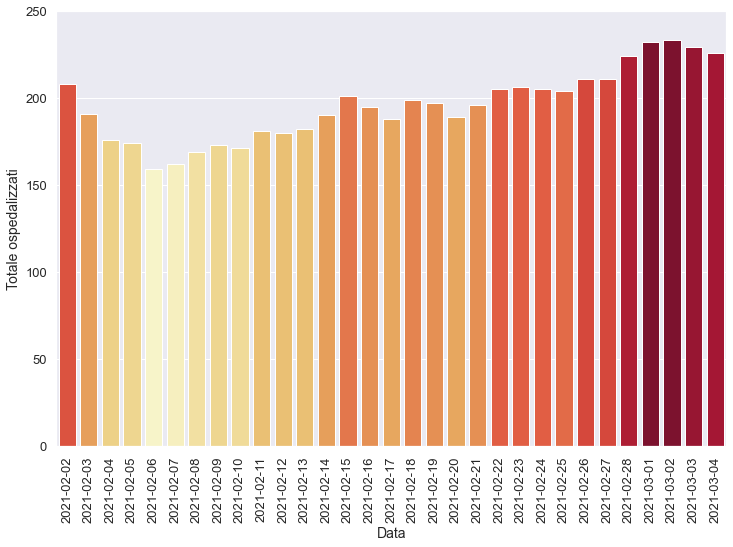

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

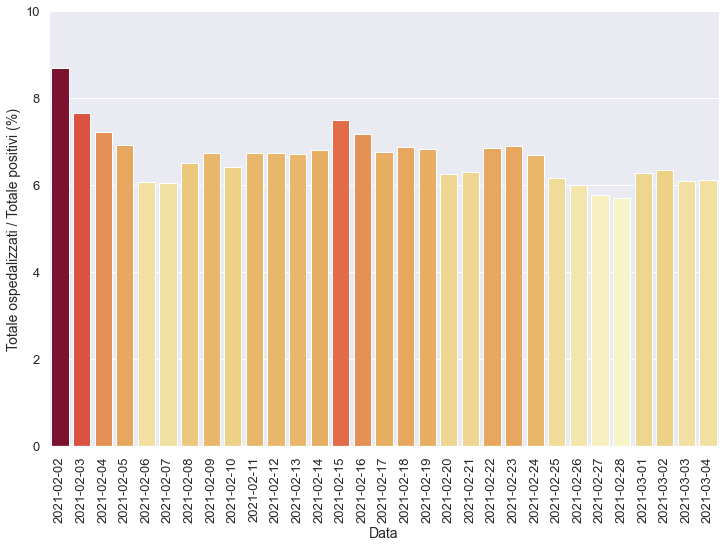

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

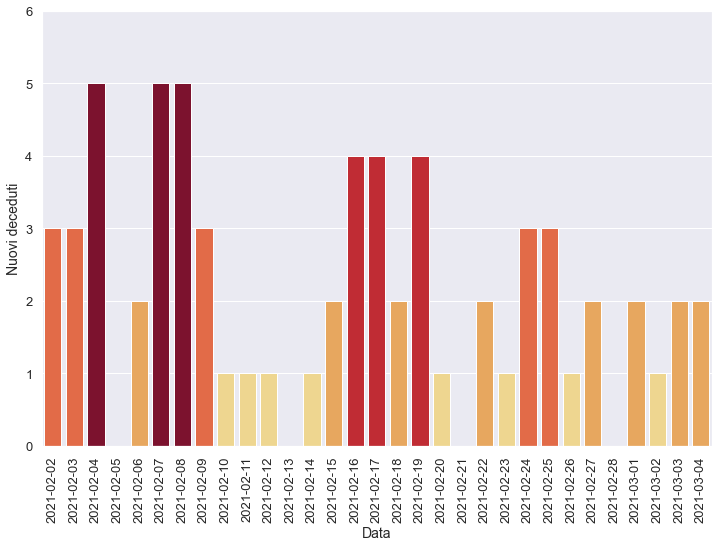

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

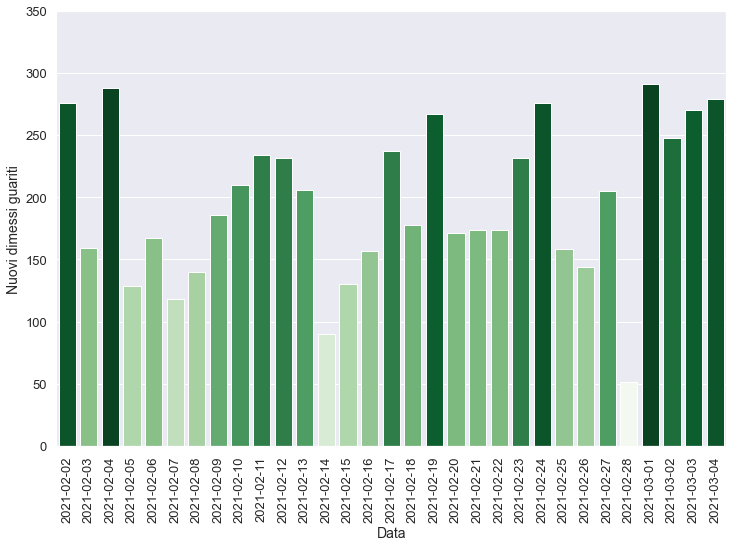

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-25T17:00:00,22,P.A. Trento,168,36,204,3111,3315,245,406,...,3.0,3940.0,355.0,246.0,17.65,6.15,10.30,114.37,2.86,7.98
1,2021-02-26T17:00:00,22,P.A. Trento,173,38,211,3310,3521,206,351,...,1.0,3475.0,391.0,199.0,18.01,5.99,10.10,89.77,5.56,6.21
2,2021-02-27T17:00:00,22,P.A. Trento,173,38,211,3444,3655,134,341,...,2.0,4011.0,577.0,134.0,18.01,5.77,8.50,59.10,0.00,3.81
3,2021-02-28T17:00:00,22,P.A. Trento,185,39,224,3709,3933,278,329,...,0.0,2714.0,440.0,265.0,17.41,5.70,12.12,74.77,2.63,7.61
4,2021-03-01T17:00:00,22,P.A. Trento,190,42,232,3465,3697,-236,57,...,2.0,1143.0,368.0,-244.0,18.10,6.28,4.99,15.49,7.69,-6.00
5,2021-03-02T17:00:00,22,P.A. Trento,191,42,233,3435,3668,-29,220,...,1.0,3060.0,465.0,-30.0,18.03,6.35,7.19,47.31,0.00,-0.78
6,2021-03-03T17:00:00,22,P.A. Trento,182,47,229,3524,3753,85,357,...,2.0,4061.0,680.0,89.0,20.52,6.10,8.79,52.50,11.90,2.32
7,2021-03-04T17:00:00,22,P.A. Trento,180,46,226,3475,3701,-52,229,...,2.0,3752.0,367.0,-49.0,20.35,6.11,6.10,62.40,-2.13,-1.39


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

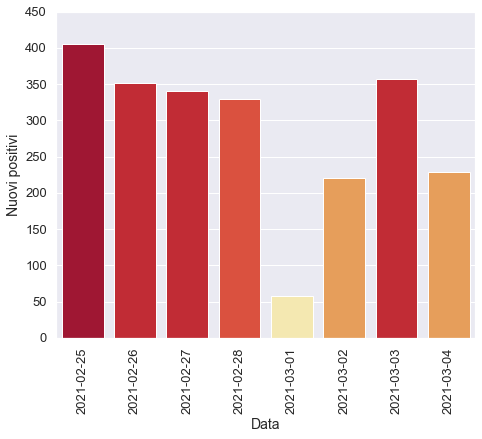

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

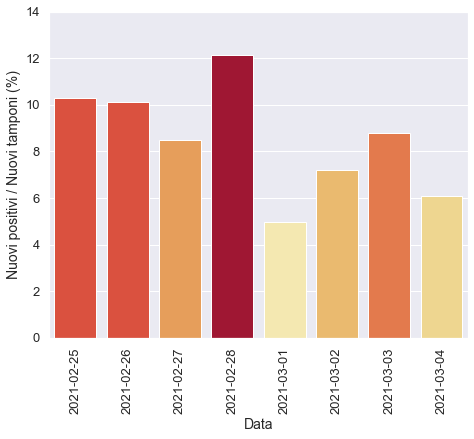

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

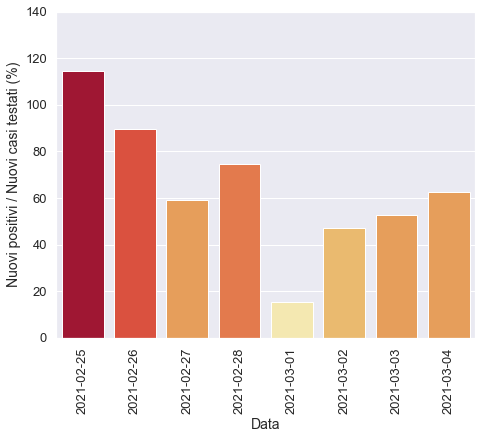

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

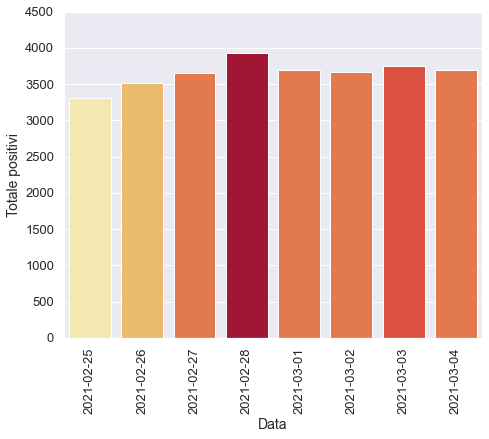

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

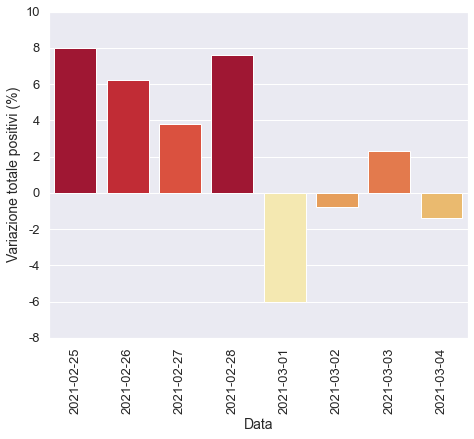

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

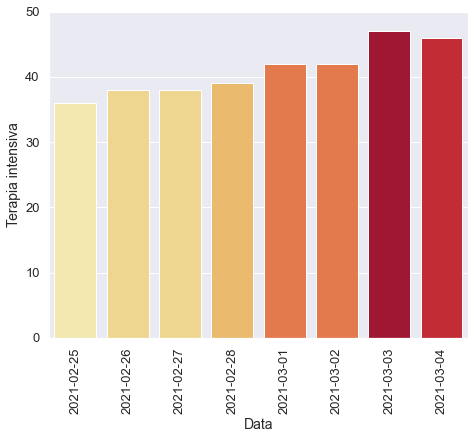

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

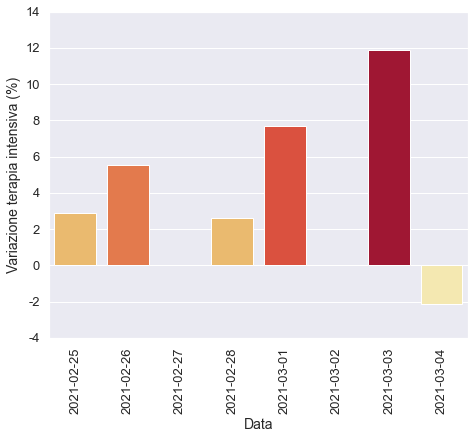

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

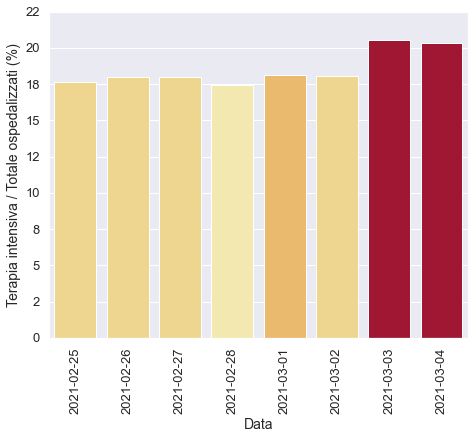

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

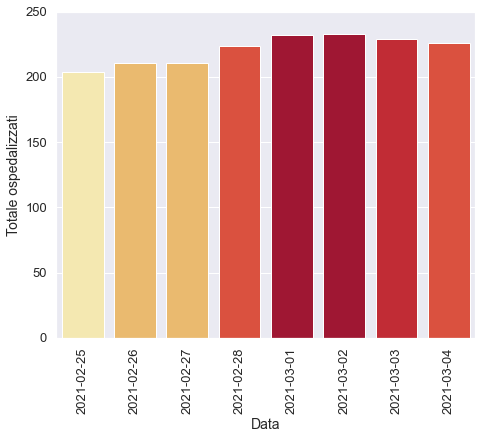

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

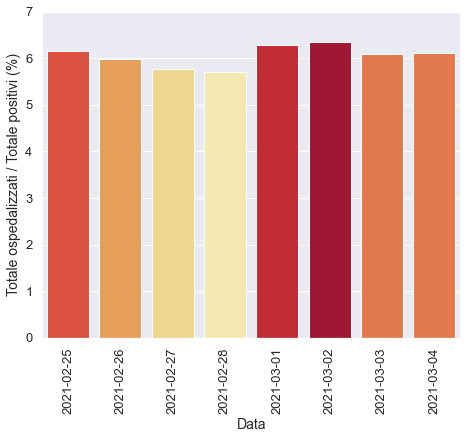

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

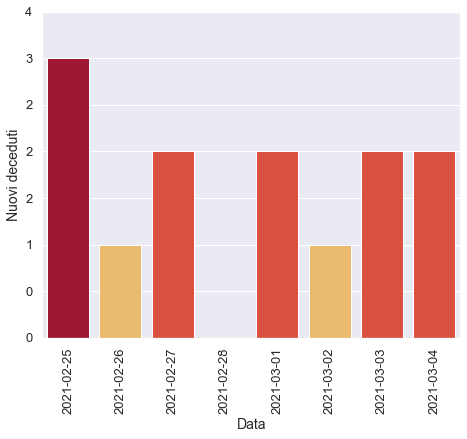

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

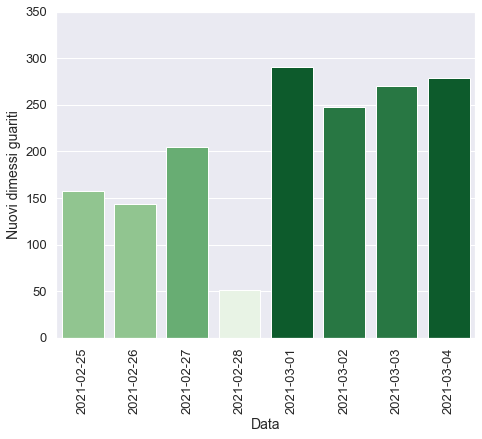

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)